In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food-waste/Food Waste data and research - by country.csv


In [2]:
df = pd.read_csv('/kaggle/input/food-waste/Food Waste data and research - by country.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [3]:
df.tail()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
213,Zimbabwe,144,100,1458564,16,229059,28,404920,Very Low Confidence,716,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [4]:
df.shape

(214, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [6]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [7]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


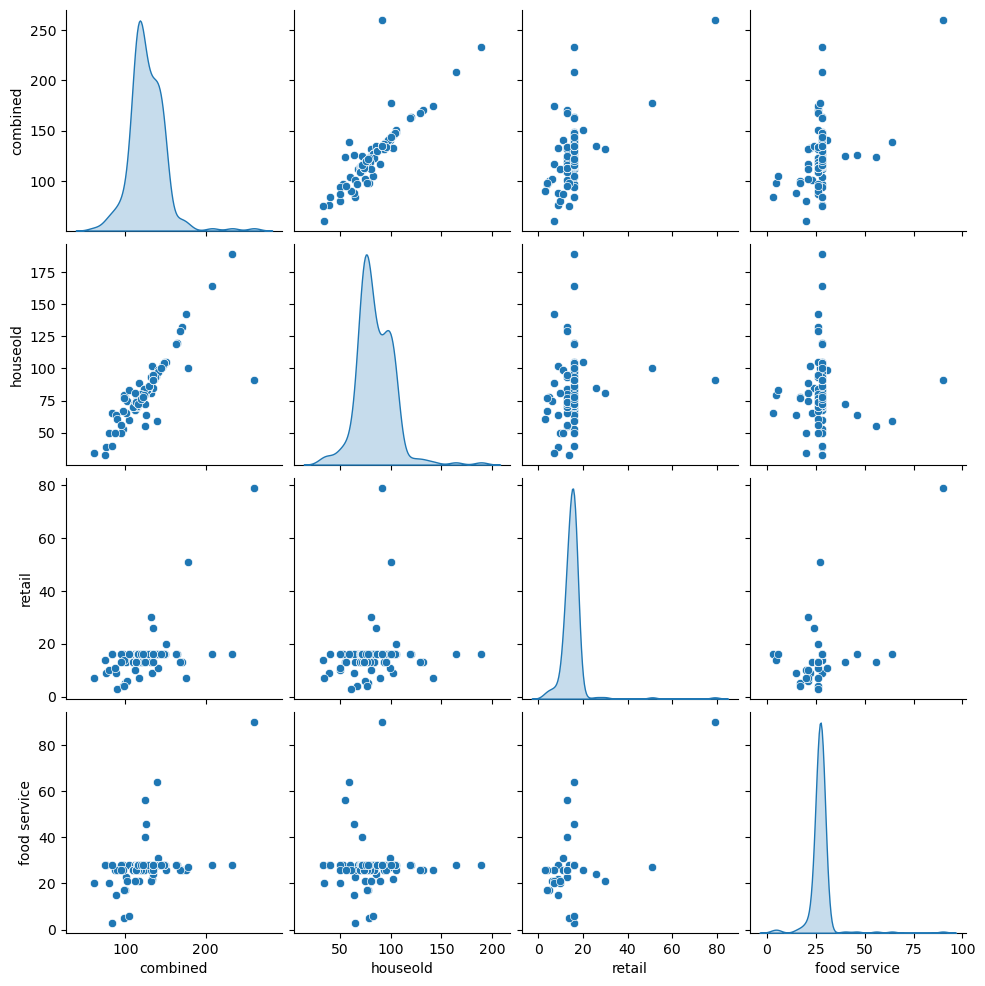

In [8]:
from seaborn import pairplot
kg_columns = [item for item in df.columns if 'kg' in item]
readable_columns = ['combined', 'houseold', 'retail', 'food service']
pairplot(data=df[kg_columns].rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), diag_kind='kde')